# Problem Statement

Employee turn-over (also known as "employee churn") is a costly problem for companies. The true cost of replacing an employee can often be quite large. A study by the Center for American Progress found that companies typically pay about one-fifth of an employee’s salary to replace that employee, and the cost can significantly increase if executives or highest-paid employees are to be replaced. In other words, the cost of replacing employees for most employers remains significant. This is due to the amount of time spent to interview and find a replacement, sign-on bonuses, and the loss of productivity for several months while the new employee gets accustomed to the new role.

In this study, given that we have data on former employees, this is a supervised classification problem where the label is a binary variable, 0 (active employee), 1 (former employee). In this study, our target variable Y is the probability of an employee leaving the company.

This project would fall under what is commonly known as **"HR Analytics", "People Analytics"**.

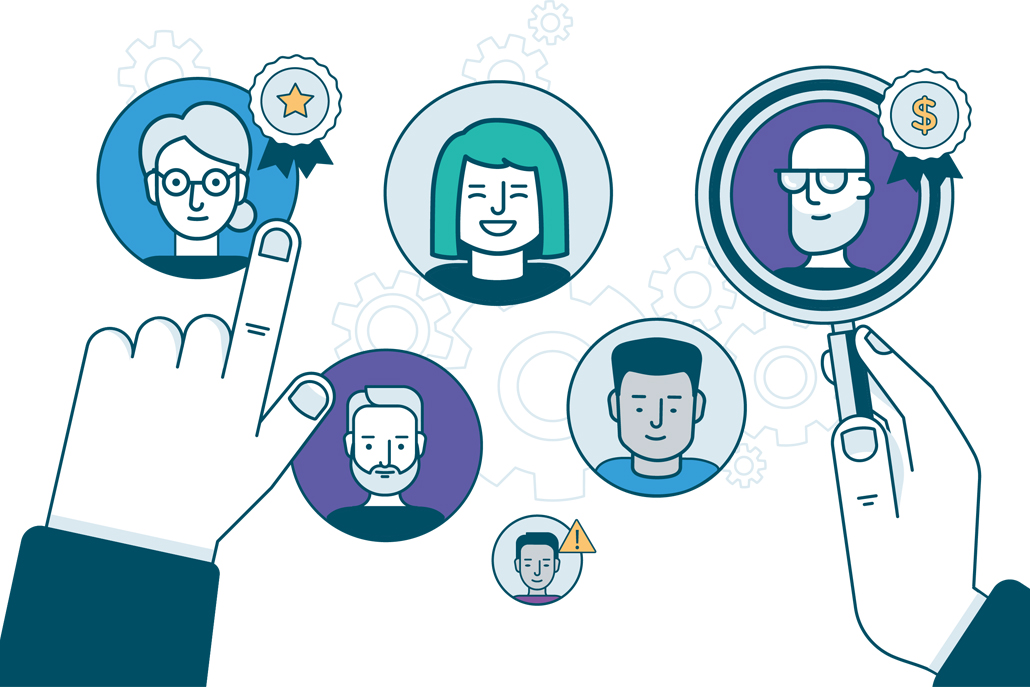

# Importing Python Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing data wrangling libraries
import pandas as pd
import numpy as np

In [3]:
# importing libraries for data visualisations
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib
%matplotlib inline
color = sns.color_palette()
from IPython.display import display
pd.options.display.max_columns = None
# Standard plotly imports
import plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
#py.initnotebookmode(connected=True) # this code, allow us to work with offline plotly version
# Using plotly + cufflinks in offline mode
import cufflinks as cf
cf.set_config_file(offline=True)
import cufflinks
cufflinks.go_offline(connected=True)

In [4]:
# Modules for Balancing the Train Dataset
from imblearn.combine import SMOTETomek


# Common sklearn Model Helpers
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics


# sklearn modules for performance metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve, recall_score, log_loss
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, make_scorer
from sklearn.metrics import average_precision_score

In [5]:
from sklearn.preprocessing import LabelEncoder


from sklearn.model_selection import train_test_split  # import 'train_test_split'
from sklearn.metrics import confusion_matrix, average_precision_score, classification_report
from sklearn.model_selection import cross_val_predict, train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV
import xgboost as xgb
from collections import Counter

from sklearn.preprocessing import RobustScaler, MinMaxScaler
from scipy.stats import boxcox 

from sklearn.decomposition import PCA

# Importing the data

> Let's import the dataset and make of a copy of the source file for this analysis. <br>  The dataset contains 1,470 rows and 35 columns.

In [6]:
import os
print(os.listdir("../input"))

['ibm-hr-analytics-attrition-dataset', 'telco-customer-churn', 'heart-attack-analysis-prediction-dataset', 'heart-failure-prediction']


In [7]:
# Read Excel file
df_sourcefile = pd.read_csv('../input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv')
print("Shape of dataframe is: {}".format(df_sourcefile.shape))

Shape of dataframe is: (1470, 35)


In [8]:
# Make a copy of the original sourcefile
df_HR = df_sourcefile.copy()

# EDA Analysis

In [9]:
# Changing the default pandas settings to see the full table
pd.set_option('display.max_rows', 1000);
pd.set_option('display.max_columns', 1000); 

In [10]:
# Describing the numerical variables in a tabular format
df_HR.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [11]:
# Describing the categorical variables in a tabular format
df_HR.describe(include='O').T

,count,unique,top,freq
Attrition,1470,2,No,1233
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
EducationField,1470,6,Life Sciences,606
Gender,1470,2,Male,882
JobRole,1470,9,Sales Executive,326
MaritalStatus,1470,3,Married,673
Over18,1470,1,Y,1470
OverTime,1470,2,No,1054


In [12]:
# Showing dataset first 5 rows
df_HR.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [13]:
# Dataset columns
df_HR.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [14]:
df_HR.columns.to_series().groupby(df_HR.dtypes).groups

{int64: ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'], object: ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']}

> The dataset contains several numerical and categorical columns providing various information on employee's personal and employment details.

In [15]:
# Columns datatypes and missign values
df_HR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [16]:
df_HR.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

> As we can see there is no missing value inside the df.

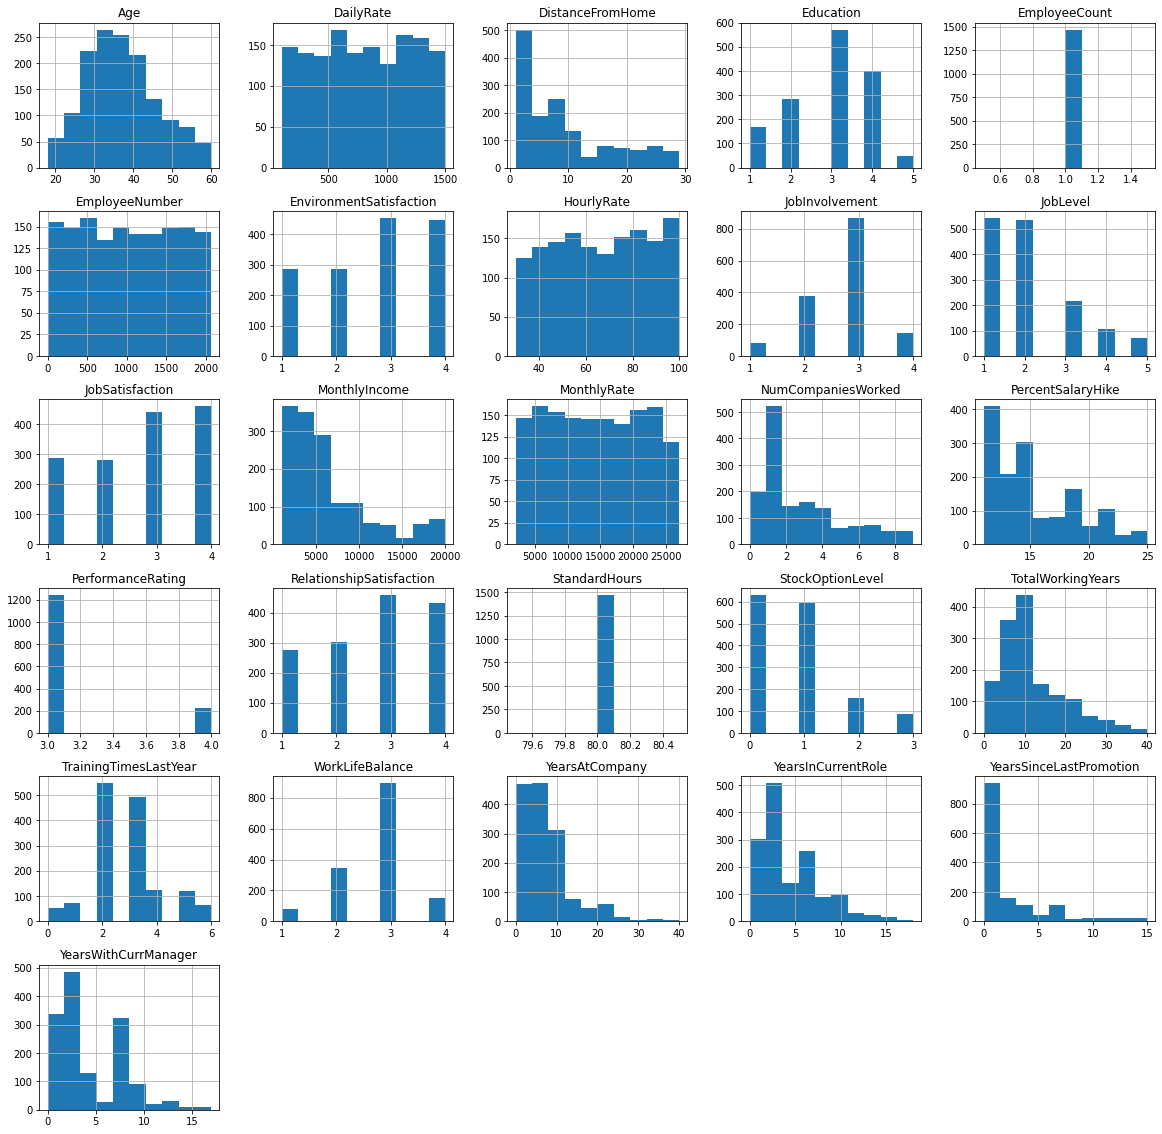

In [17]:
# Plotting the numerical variables in histograms to see their distribution.
df_HR.hist(figsize=(20,20))
plt.show()

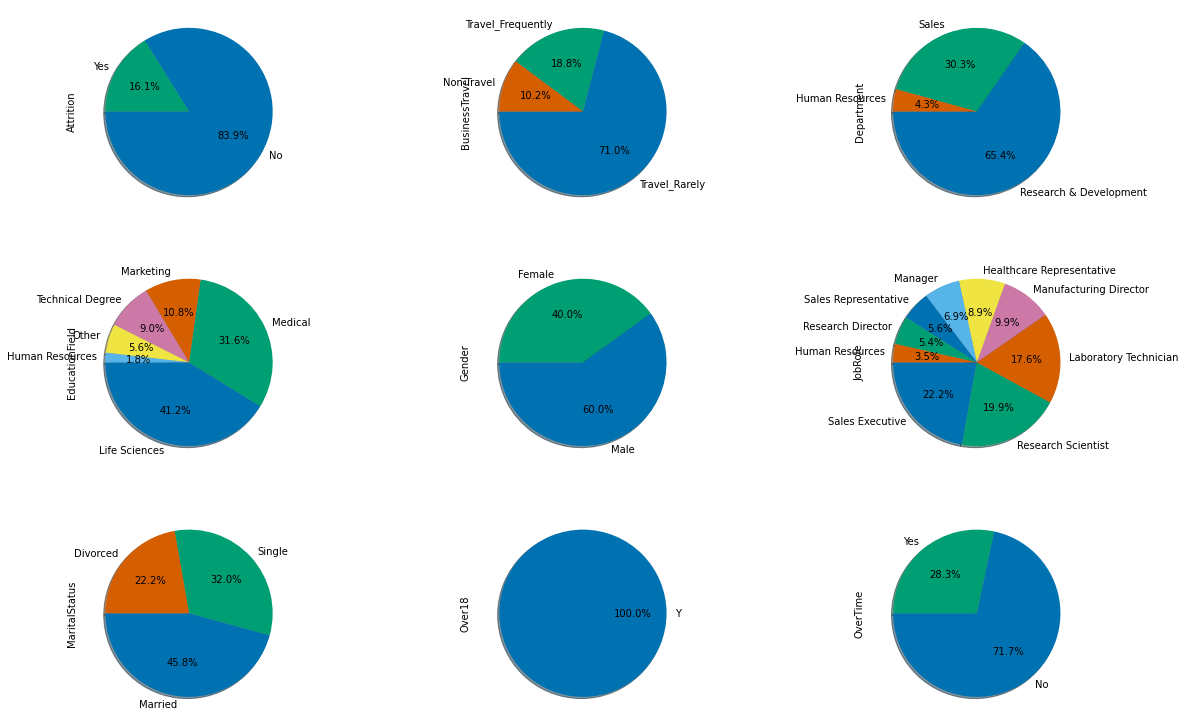

In [18]:
# Plotting the categorical variables to see their distribution
fig=plt.figure(figsize=(20,50))
plt.style.use('seaborn-colorblind')
for i in range(len((df_HR.select_dtypes(include='object')).columns)):
    fig.add_subplot(11,3,i+1)
    df_HR.select_dtypes(include='object').iloc[:,i].value_counts().plot(kind="pie",  subplots=True,autopct='%1.1f%%',
        shadow=True, startangle=180)

In [19]:
# Dropping variables that just have one value.
df_HR.drop([ 'EmployeeCount', 'EmployeeNumber', 'StandardHours', 'Over18'], axis=1,inplace=True)

## Employee Attrition by Age

Ex-exmployees: median age = 32 years old and standard deviation = 9.7
Current exmployees: median age = 36 years old and standard deviation = 8.9


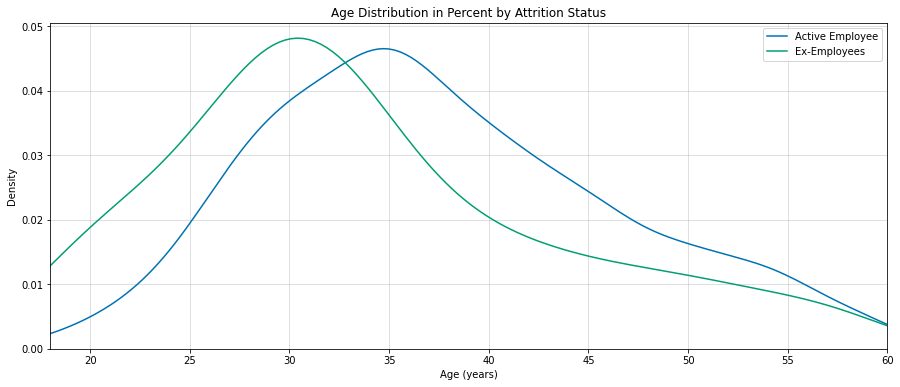

In [20]:
plt.figure(figsize=(15,6))
plt.grid(True, alpha=0.5)
sns.kdeplot(df_HR.loc[df_HR['Attrition'] == 'No', 'Age'], label = 'Active Employee')
sns.kdeplot(df_HR.loc[df_HR['Attrition'] == 'Yes', 'Age'], label = 'Ex-Employees')
plt.xlim(left=18, right=60)
plt.xlabel('Age (years)')
plt.ylabel('Density')
plt.legend()
plt.title('Age Distribution in Percent by Attrition Status');
print('Ex-exmployees: median age = {:.0f} years old and standard deviation = {:.1f}'.format(df_HR[df_HR['Attrition']=='Yes']['Age'].median(), df_HR[df_HR['Attrition']=='Yes']['Age'].std()))
print('Current exmployees: median age = {:.0f} years old and standard deviation = {:.1f}'.format(df_HR[df_HR['Attrition']=='No']['Age'].median(), df_HR[df_HR['Attrition']=='No']['Age'].std()))

> As we can see the Employee's leaving tend to be younger.

## Employee Attrition by Distance

Distance from home for employees to get to work is from 1 to 29 miles.
Average distance from home for currently active employees: 8.92 miles and ex-employees: 10.63 miles
Median distance from home for currently active employees: 7 miles and ex-employees: 9 miles
Standard Deviation distance from home for currently active employees: 8.01 miles and ex-employees: 8.45 miles


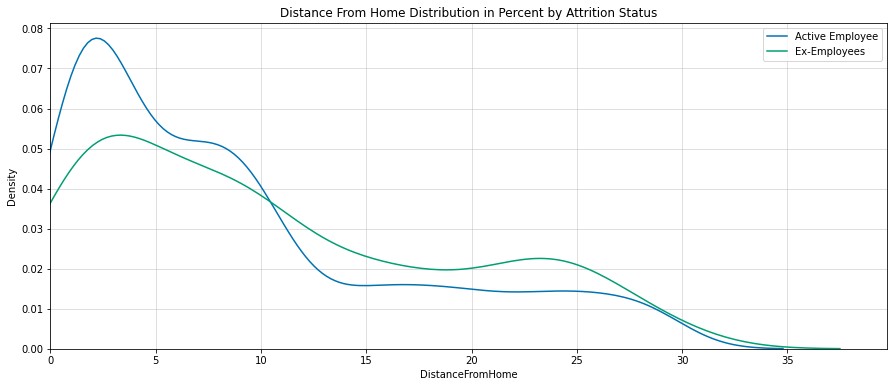

In [21]:
print("Distance from home for employees to get to work is from {} to {} miles.".format(df_HR['DistanceFromHome'].min(),
                                                                                       df_HR['DistanceFromHome'].max()))

print('Average distance from home for currently active employees: {:.2f} miles and ex-employees: {:.2f} miles'.format(
    df_HR[df_HR['Attrition'] == 'No']['DistanceFromHome'].mean(), df_HR[df_HR['Attrition'] == 'Yes']['DistanceFromHome'].mean()))

print('Median distance from home for currently active employees: {:.0f} miles and ex-employees: {:.0f} miles'.format(
    df_HR[df_HR['Attrition'] == 'No']['DistanceFromHome'].median(), df_HR[df_HR['Attrition'] == 'Yes']['DistanceFromHome'].median()))

print('Standard Deviation distance from home for currently active employees: {:.2f} miles and ex-employees: {:.2f} miles'.format(
    df_HR[df_HR['Attrition'] == 'No']['DistanceFromHome'].std(), df_HR[df_HR['Attrition'] == 'Yes']['DistanceFromHome'].std()))


plt.figure(figsize=(15,6))
plt.grid(True, alpha=0.5)
sns.kdeplot(df_HR.loc[df_HR['Attrition'] == 'No', 'DistanceFromHome'], label = 'Active Employee')
sns.kdeplot(df_HR.loc[df_HR['Attrition'] == 'Yes', 'DistanceFromHome'], label = 'Ex-Employees')
plt.xlabel('DistanceFromHome')
plt.xlim(left=0)
plt.ylabel('Density')
plt.legend()
plt.title('Distance From Home Distribution in Percent by Attrition Status');

> As we can see the Employee's leaving tend to be farther from home.

## Employee Attrition by Years

Number of Years at the company varies from 0 to 40 years.
Ex-exmployees: median number of year at the company = 3 years old and standard deviation = 9.7
Current exmployees: median number of year at the company = 6 years old and standard deviation = 8.9


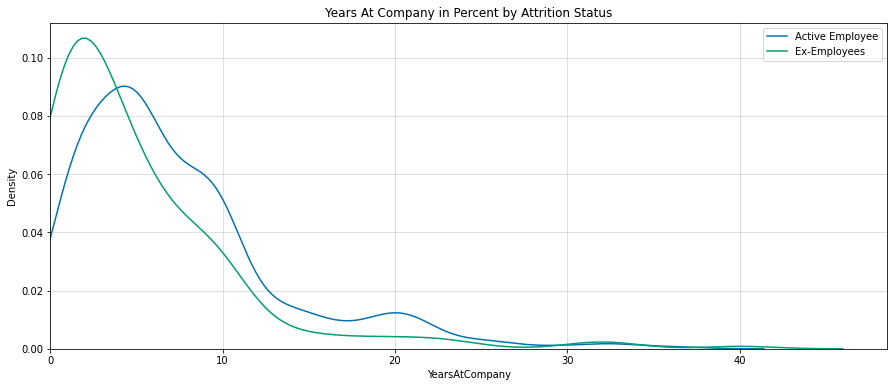

In [22]:
print("Number of Years at the company varies from {} to {} years.".format(
    df_HR['YearsAtCompany'].min(), df_HR['YearsAtCompany'].max()))

print('Ex-exmployees: median number of year at the company = {:.0f} years old and standard deviation = {:.1f}'.format(
    df_HR[df_HR['Attrition']=='Yes']['YearsAtCompany'].median(), df_HR[df_HR['Attrition']=='Yes']['Age'].std()))
print('Current exmployees: median number of year at the company = {:.0f} years old and standard deviation = {:.1f}'.format
      (df_HR[df_HR['Attrition']=='No']['YearsAtCompany'].median(), df_HR[df_HR['Attrition']=='No']['Age'].std()))

plt.figure(figsize=(15,6))
plt.grid(True, alpha=0.5)
sns.kdeplot(df_HR.loc[df_HR['Attrition'] == 'No', 'YearsAtCompany'], label = 'Active Employee')
sns.kdeplot(df_HR.loc[df_HR['Attrition'] == 'Yes', 'YearsAtCompany'], label = 'Ex-Employees')
plt.xlabel('YearsAtCompany')
plt.xlim(left=0)
plt.ylabel('Density')
plt.legend()
plt.title('Years At Company in Percent by Attrition Status');

> As we can see the Employee's leaving tend to have more seniority at the Company.

## Target Variable EDA

In [23]:
# Attrition indicates if the employee is currently active ('No') or has left the company ('Yes')
df_HR['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [24]:
print("Percentage of Current Employees is {:.1f}% and of Ex-employees is: {:.1f}%".format(
    df_HR[df_HR['Attrition'] == 'No'].shape[0] / df_HR.shape[0]*100,
    df_HR[df_HR['Attrition'] == 'Yes'].shape[0] / df_HR.shape[0]*100))

Percentage of Current Employees is 83.9% and of Ex-employees is: 16.1%


In [25]:
df_HR['Attrition'].iplot(kind='hist', xTitle='Attrition',
                         yTitle='count', title='Attrition Distribution', color='darkblue')

As shown on the chart above, we see this is an imbalanced class problem. Indeed, the percentage of Current Employees in our dataset is 83.9% and the percentage of Ex-employees is: 16.1%

Machine learning algorithms typically work best when the number of instances of each classes are roughly equal. We will have to address this target feature imbalance prior to implementing our Machine Learning algorithms with a stratified approach.

# Correlation Analysis

Let's take a look at some of most significant correlations. It is worth remembering that correlation coefficients only measure linear correlations.

* **What is correlation?**
    
    Correlation is a statistical term describing the degree to which two variables move in coordination with one another. If the two variables move in the same direction, then those variables are said to have a positive correlation. If they move in opposite directions, then they have a negative correlation.

Reference: https://www.investopedia.com/terms/c/correlation.asp#:~:text=Correlation%20is%20a%20statistical%20term,they%20have%20a%20negative%20correlation.

In [26]:
# Find correlations with the target and sort
df_HR_corr = df_HR.copy()
df_HR_corr['Target'] = df_HR_corr['Attrition'].apply(lambda x: 0 if x == 'No' else 1)
df_HR_corr = df_HR_corr.drop(['Attrition'], axis=1)
correlations = df_HR_corr.corr()['Target'].sort_values()
print('Most Positive Correlations: \n', correlations.tail(6))
print('\nMost Negative Correlations: \n', correlations.head(5))

Most Positive Correlations: 
 HourlyRate           -0.006846
PerformanceRating     0.002889
MonthlyRate           0.015170
NumCompaniesWorked    0.043494
DistanceFromHome      0.077924
Target                1.000000
Name: Target, dtype: float64

Most Negative Correlations: 
 TotalWorkingYears    -0.171063
JobLevel             -0.169105
YearsInCurrentRole   -0.160545
MonthlyIncome        -0.159840
Age                  -0.159205
Name: Target, dtype: float64


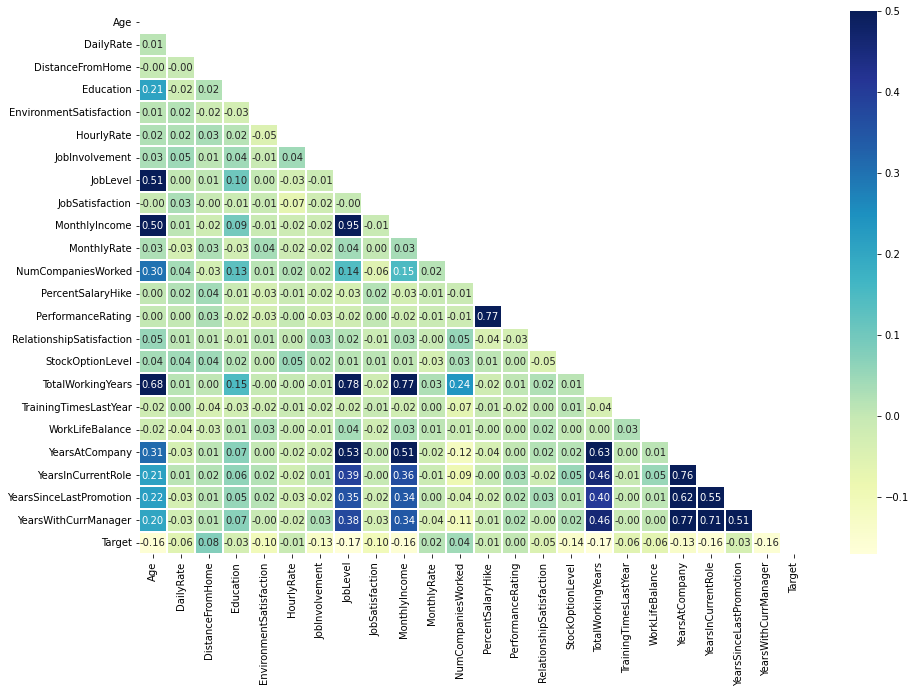

In [27]:
# Calculate correlations
corr = df_HR_corr.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
# Heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr,
            vmax=.5,
            mask=mask,
            annot=True, fmt='.2f',
            linewidths=.2, cmap="YlGnBu");

# Outlier Analysis & Filtering

### Winsorization
To winsorize data means to set extreme outliers equal to a specified percentile of the data, in this case we are going to be conservative and we are going to stay with the 98% of every variable, filtering the top 1% and bottom 1%.
<br><br>
 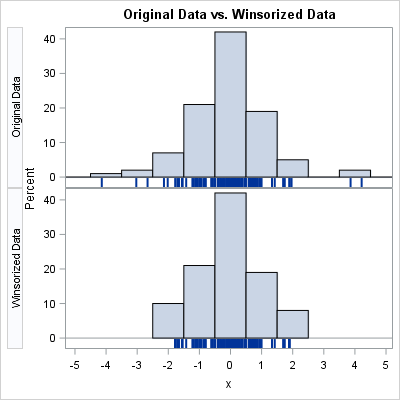

In [28]:
def Winsorization_outliers(df):
    q1 = np.percentile(df , 1)
    q3 = np.percentile(df , 99)
    out=[]
    for i in df:
        if (i > q3 or i < q1) and i>0:
            out.append(i)
    print("Outliers:",out)
    return out;
def remove_outliers(df):
    print("Registers in the initial dataset:",df.shape[0])
    for col in df.columns[1:]:
        if df[col].dtype != 'object':
            print(col)
            data_filter = Winsorization_outliers(df[col])
            df = df[~df[col].isin(data_filter)]
            print("Registers without outliers in "+col+" :"+ str(df.shape[0]))
    return df;


df_HR_Cleaned = remove_outliers(df_HR)
        

Registers in the initial dataset: 1470
DailyRate
Outliers: [103, 1488, 111, 1496, 111, 106, 1490, 1490, 1499, 1495, 102, 109, 1492, 111, 116, 107, 1498, 1495, 1490, 1496, 115, 104, 1495, 1490, 116, 105]
Registers without outliers in DailyRate :1444
DistanceFromHome
Outliers: []
Registers without outliers in DistanceFromHome :1444
Education
Outliers: []
Registers without outliers in Education :1444
EnvironmentSatisfaction
Outliers: []
Registers without outliers in EnvironmentSatisfaction :1444
HourlyRate
Outliers: []
Registers without outliers in HourlyRate :1444
JobInvolvement
Outliers: []
Registers without outliers in JobInvolvement :1444
JobLevel
Outliers: []
Registers without outliers in JobLevel :1444
JobSatisfaction
Outliers: []
Registers without outliers in JobSatisfaction :1444
MonthlyIncome
Outliers: [1232, 19926, 1102, 19999, 1200, 1009, 1281, 19859, 1051, 19973, 19845, 1052, 19627, 19943, 19740, 1223, 1118, 19847, 19717, 19701, 1359, 1261, 1274, 19658, 19833, 19665, 1081, 109

# Feature Engineering

In [29]:
df_HR_Cleaned['Attrition'] = df_HR_Cleaned['Attrition'].apply(lambda x: 0 if x == 'No' else 1)

In [30]:
df_HR_Cleaned.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


* **What is Label Encoding?**

Label Encoding is a popular encoding technique for handling categorical variables. In this technique, each label is assigned a unique integer based on alphabetical ordering.

* **What is a Dummy Variable?**

A dummy variable is a numeric variable that encodes categorical information.

Dummy variables have two possible values: 0 or 1.

In a dummy variable:

    * A 1 encodes the presence of a category
    * A 0 encodes the absence of a category

In [31]:
# Create a label encoder object
le = LabelEncoder()
# Label Encoding will be used for columns with 2 or less unique values
le_count = 0
for col in df_HR_Cleaned.columns[1:]:
    if df_HR_Cleaned[col].dtype == 'object':
        if len(list(df_HR_Cleaned[col].unique())) <= 2:
            le.fit(df_HR_Cleaned[col])
            df_HR_Cleaned[col] = le.transform(df_HR_Cleaned[col])
            le_count += 1
print('{} columns were label encoded.'.format(le_count))

# convert rest of categorical variable into dummy
df_HR_Cleaned = pd.get_dummies(df_HR_Cleaned, drop_first=True)

2 columns were label encoded.


In [32]:
print(df_HR_Cleaned.shape)
df_HR_Cleaned.head()

(1326, 45)


,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,2,0,94,3,2,4,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,49,0,279,8,1,3,1,61,2,2,2,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,37,1,1373,2,2,4,1,92,2,1,3,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
3,33,0,1392,3,4,4,0,56,3,1,3,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,27,0,591,2,1,1,1,40,3,1,2,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0


In [33]:
# As we can see here, all of our variables were turned into numericals.
df_HR_Cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1326 entries, 0 to 1469
Data columns (total 45 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1326 non-null   int64
 1   Attrition                          1326 non-null   int64
 2   DailyRate                          1326 non-null   int64
 3   DistanceFromHome                   1326 non-null   int64
 4   Education                          1326 non-null   int64
 5   EnvironmentSatisfaction            1326 non-null   int64
 6   Gender                             1326 non-null   int64
 7   HourlyRate                         1326 non-null   int64
 8   JobInvolvement                     1326 non-null   int64
 9   JobLevel                           1326 non-null   int64
 10  JobSatisfaction                    1326 non-null   int64
 11  MonthlyIncome                      1326 non-null   int64
 12  MonthlyRate         

# Outlier Filtering using Mahalanobis Distance

* **What is the Mahalanobis Distance?**

Mahalanobis Distance is an effective distance metric that finds the distance between the point and distribution.  It works quite effectively on multivariate data because it uses a covariance matrix of variables to find the distance between data points and the center, this means that MD detects outliers based on the distribution pattern of data points, unlike the Euclidean distance that assumes the sample points are distributed about the center of mass in a spherical manner.


![](https://www.googleapis.com/download/storage/v1/b/kaggle-forum-message-attachments/o/inbox%2F6892640%2Fdb00cb320c6416adf477510795b322a0%2FMalahanobis_euclidean.jpeg?generation=1663920977414690&alt=media)

The Mahalanobis distance is the distance of the test point from the center of mass divided by the width of the ellipsoid in the direction of the test point.

Source: [https://towardsdatascience.com/multivariate-outlier-detection-in-python-e946cfc843b3](url)

* **What is PCA?**

Principal component analysis (PCA) is a popular technique for analyzing large datasets containing a high number of dimensions/features per observation, increasing the interpretability of data while preserving the maximum amount of information, and enabling the visualization of multidimensional data. Formally, PCA is a statistical technique for reducing the dimensionality of a dataset. This is accomplished by linearly transforming the data into a new coordinate system where (most of) the variation in the data can be described with fewer dimensions than the initial data. 

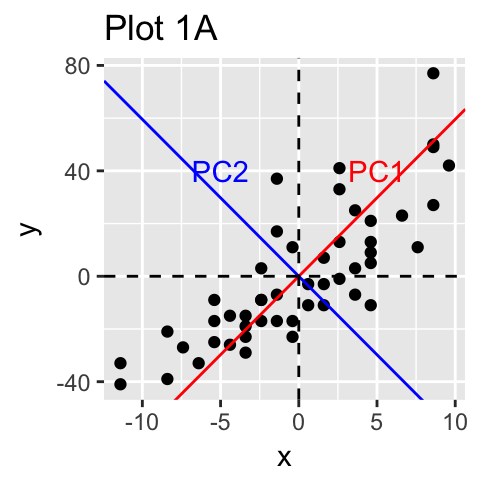

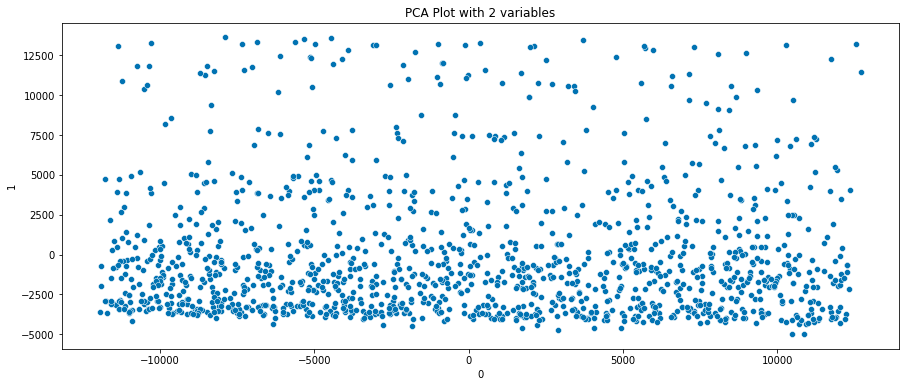

Components =  2 ;
Total explained variance =  0.99758


In [34]:
# Reducing in 2 components your data with Principal Component Analysis to filter outliers through Mahalanobis Distance.
n=2
training_data = df_HR_Cleaned.copy()
pca = PCA(n_components=n, svd_solver= 'full')
X_train_PCA = pca.fit_transform(training_data)
X_train_PCA = pd.DataFrame(X_train_PCA)
X_train_PCA.index = training_data.index
X_train_PCA.head()


plt.figure(figsize=(15,6))
sns.scatterplot(x=X_train_PCA[0],data=X_train_PCA,y=X_train_PCA[1])
plt.title('PCA Plot with {} variables'.format(pca.n_components_))
plt.show()

#PCA Explained Variance Ratio & Components
print ( "Components = ", pca.n_components_ , ";\nTotal explained variance = ",
      round(pca.explained_variance_ratio_.sum(),5)  )

In [35]:
def cov_matrix(data, verbose=False):
    covariance_matrix = np.cov(data, rowvar=False)
    if is_pos_def(covariance_matrix):
        inv_covariance_matrix = np.linalg.inv(covariance_matrix)
        if is_pos_def(inv_covariance_matrix):
            return covariance_matrix, inv_covariance_matrix
        else:
            print("Error: Inverse of Covariance Matrix is not positive definite!")
    else:
        print("Error: Covariance Matrix is not positive definite!")
def MahalanobisDist(inv_cov_matrix, mean_distr, data, verbose=False):
    inv_covariance_matrix = inv_cov_matrix
    vars_mean = mean_distr
    diff = data - vars_mean
    md = []
    for i in range(len(diff)):
        md.append(np.sqrt(diff[i].dot(inv_covariance_matrix).dot(diff[i])))
    return md
def MD_detectOutliers(dist, extreme=False, verbose=False):
    k = 3. if extreme else 2.
    threshold = np.mean(dist) * k
    outliers = []
    for i in range(len(dist)):
        if dist[i] >= threshold:
            outliers.append(i)
    return np.array(outliers)
def MD_threshold(dist, extreme=False, verbose=False):
    k = 3. if extreme else 2.
    threshold = np.mean(dist) * k
    return threshold
def is_pos_def(A):
    if np.allclose(A, A.T):
        try:
            np.linalg.cholesky(A)
            return True
        except np.linalg.LinAlgError:
            return False
    else:
        return False
data_train = np.array(X_train_PCA.values)
cov_matrix, inv_cov_matrix  = cov_matrix(data_train)
mean_distr = data_train.mean(axis=0)
dist_train = MahalanobisDist(inv_cov_matrix, mean_distr, data_train, verbose=False)
threshold = MD_threshold(dist_train, extreme = True)
print("Mahalanobis Distance Threshold is {:.2f}".format(threshold))

Mahalanobis Distance Threshold is 3.80


(0.0, 15.0)

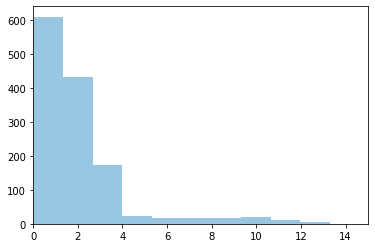

In [36]:
plt.figure()
sns.distplot(np.square(dist_train),
             bins = 10, 
             kde= False);
plt.xlim([0.0,15])

Text(0.5, 0, 'Mahalanobis dist')

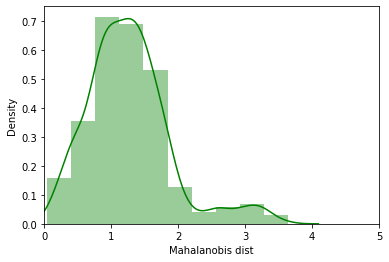

In [37]:
plt.figure()
sns.distplot(dist_train,
             bins = 10, 
             kde= True, 
            color = 'green');
plt.xlim([0.0,5])
plt.xlabel('Mahalanobis dist')

In [38]:
#Defined the threshold based on the graph and the Mahalanobis Distance Threshold indicated above.
threshold = 3.5

In [39]:
anomaly_train = pd.DataFrame()
anomaly_train['Mob dist']= dist_train
anomaly_train['Thresh'] = threshold
anomaly_train['Anomaly'] = anomaly_train['Mob dist'] > anomaly_train['Thresh']
anomaly_train.index = X_train_PCA.index

In [40]:
anomaly_train['Anomaly'].value_counts()


False    1323
True        3
Name: Anomaly, dtype: int64

In [41]:
training_data = training_data[~anomaly_train['Anomaly']]


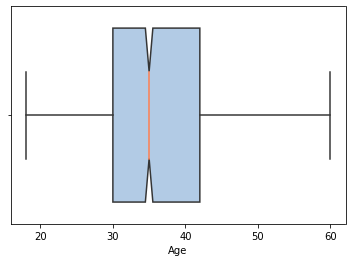

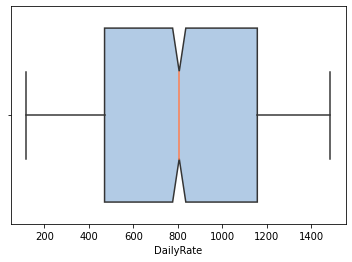

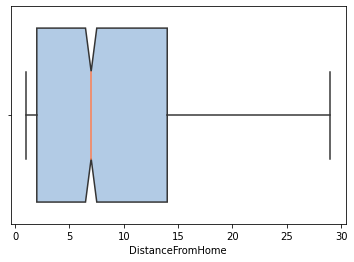

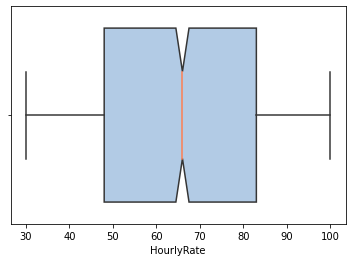

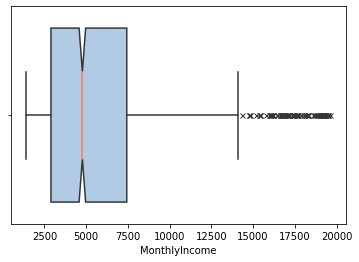

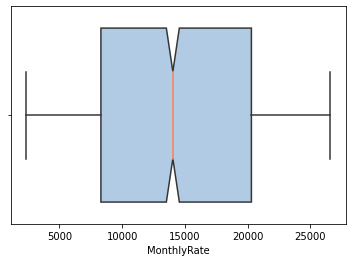

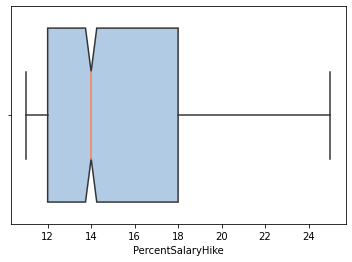

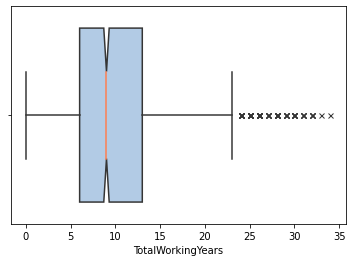

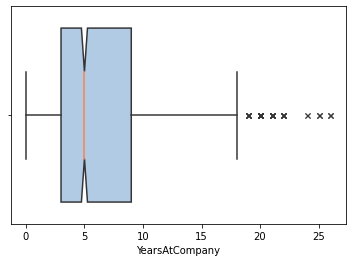

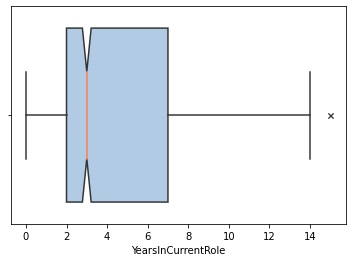

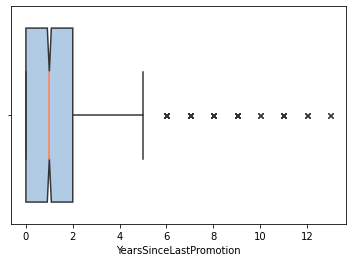

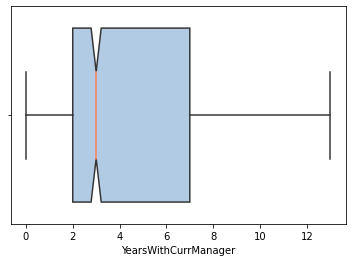

In [42]:
for col in training_data.columns:
    if (training_data[col].dtype != 'object') & (len(training_data[col].unique()) > 10):
        sns.boxplot(x=training_data[col],    flierprops={"marker": "x"},boxprops={"facecolor": (.4, .6, .8, .5)}, medianprops={"color": "coral"},notch=True)
        plt.show()

In [43]:
training_data.shape
training_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1323 entries, 0 to 1469
Data columns (total 45 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1323 non-null   int64
 1   Attrition                          1323 non-null   int64
 2   DailyRate                          1323 non-null   int64
 3   DistanceFromHome                   1323 non-null   int64
 4   Education                          1323 non-null   int64
 5   EnvironmentSatisfaction            1323 non-null   int64
 6   Gender                             1323 non-null   int64
 7   HourlyRate                         1323 non-null   int64
 8   JobInvolvement                     1323 non-null   int64
 9   JobLevel                           1323 non-null   int64
 10  JobSatisfaction                    1323 non-null   int64
 11  MonthlyIncome                      1323 non-null   int64
 12  MonthlyRate         

# Remove collinear features

* **What is Collinearity?**

 Is a phenomenon in which one feature variable in a regression model is highly linearly correlated with another feature variable.
 
 Source: https://medium.com/future-vision/collinearity-what-it-means-why-its-bad-and-how-does-it-affect-other-models-94e1db984168#:~:text=1%20In%20statistics%2C%20multicollinearity%20

In [44]:
# Threshold for removing correlated variables
threshold = 0.85

# Absolute value correlation matrix
corr_matrix = training_data.corr().abs()
corr_matrix.head()

# Upper triangle of correlations
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper.head()

# Select columns with correlations above threshold
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

print('There are %d columns to remove :' % (len(to_drop)))

training_data = training_data.drop(columns = to_drop)

to_drop

There are 2 columns to remove :


['MonthlyIncome', 'Department_Sales']

# Normalizing with Box Cox Transformation & Scaling with Robust Scaling.

* **What is the box-cox transformation?**

A Box Cox transformation is a transformation of non-normal dependent variables into a normal shape. Normality is an important assumption for many statistical techniques; if your data isn’t normal, applying a Box-Cox means that you are able to run a broader number of tests.

Source: https://www.statisticshowto.com/probability-and-statistics/normal-distributions/box-cox-transformation/

* **What is Robust Scaling?**

If there are input variables that have very large values relative to the other input variables, these large values can dominate or skew some machine learning algorithms. The result is that the algorithms pay most of their attention to the large values and ignore the variables with smaller values.

Robust data scaling can be achieved by calculating the median (50th percentile) and the 25th and 75th percentiles. The values of each variable then have their median subtracted and are divided by the interquartile range (IQR) which is the difference between the 75th and 25th percentiles.

> value = (value – median) / (p75 – p25)

The resulting variable has a zero mean and median and a standard deviation of 1, although not skewed by outliers and the outliers are still present with the same relative relationships to other values.

Source: https://machinelearningmastery.com/robust-scaler-transforms-for-machine-learning/


In [45]:
skewed_columns=[]
for i in training_data.loc[:, training_data.ge(1).all()].columns:
    if (abs(training_data[i].skew())> 0.5)  & (len(training_data[i].unique()) >10): 
        skewed_columns.append(i)
print(skewed_columns)


['DistanceFromHome', 'PercentSalaryHike']


In [46]:
training_data.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,2,0,94,3,2,4,19479,8,1,11,3,1,0,8,0,1,6,4,0,5,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,49,0,279,8,1,3,1,61,2,2,2,24907,1,0,23,4,4,1,10,3,3,10,7,1,7,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,37,1,1373,2,2,4,1,92,2,1,3,2396,6,1,15,3,2,0,7,3,3,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
3,33,0,1392,3,4,4,0,56,3,1,3,23159,1,1,11,3,3,0,8,3,3,8,7,3,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,27,0,591,2,1,1,1,40,3,1,2,16632,9,0,12,3,4,1,6,3,3,2,2,2,2,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0


In [47]:
#scaler = MinMaxScaler(feature_range = (0,1))
scaler = RobustScaler()
HR_col = list(training_data.columns)
HR_col.remove('Attrition')
for col in HR_col:
    if col in skewed_columns:
        training_data[col], best_lambda = boxcox(training_data[col]) 
    training_data[col] = training_data[col].astype(float)
    training_data[[col]] = scaler.fit_transform(training_data[[col]])
training_data.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,0.500000,1,0.431173,-0.906794,-0.5,-0.5,-1.0,0.800000,0.0,0.0,0.5,0.453466,2.000000,1.0,-0.728765,0.0,-1.0,-1.0,-0.142857,-3.0,-2.0,0.166667,0.2,-0.5,0.4,0.0,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1.166667,0,-0.767662,0.071837,-1.0,0.0,0.0,-0.142857,-1.0,0.0,-0.5,0.905931,-0.333333,0.0,0.960669,1.0,0.5,0.0,0.142857,0.0,0.0,0.833333,0.8,0.0,0.8,1.0,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.166667,1,0.825929,-0.611930,-0.5,0.5,0.0,0.742857,-1.0,-1.0,0.0,-0.970533,1.333333,1.0,0.171397,0.0,-0.5,-1.0,-0.285714,0.0,0.0,-0.833333,-0.6,-0.5,-0.6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-0.166667,0,0.853605,-0.425589,0.5,0.5,-1.0,-0.285714,0.0,-1.0,0.0,0.760222,-0.333333,1.0,-0.728765,0.0,0.0,-1.0,-0.142857,0.0,0.0,0.500000,0.8,1.0,-0.6,1.0,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,-0.666667,0,-0.313183,-0.611930,-1.0,-1.0,0.0,-0.742857,0.0,-1.0,-0.5,0.216146,2.333333,0.0,-0.440367,0.0,0.5,0.0,-0.428571,0.0,0.0,-0.500000,-0.2,0.5,-0.2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [48]:
print('Size of Full dataset is: {}'.format(training_data.shape))

Size of Full dataset is: (1323, 43)


In [49]:

target_variable_name = 'Attrition'
target = training_data[target_variable_name].copy()

df_HR = training_data.drop(target_variable_name, axis=1).copy()

# Feature Selection with RFECV

* **What is RFECV?**

Recursive feature elimination Cross-Validated (RFECV) is a feature selection method that fits a model (cross-validated) and removes the weakest feature (or features) until the specified number of features is reached. Features are ranked by the model’s coef_ or feature_importances_ attributes, and by recursively eliminating a small number of features per loop.

Source: https://ogrisel.github.io/scikit-learn.org/sklearn-tutorial/modules/generated/sklearn.feature_selection.RFECV.html


In [50]:
estimator_LR = LogisticRegression(C=2.1, penalty='l2',  solver='liblinear')
selector_LR = RFECV(estimator_LR, step=1, cv=5,scoring='roc_auc', n_jobs = -1)
selector_LR = selector_LR.fit(df_HR, target)
print('Optimal number of features :', selector_LR.n_features_)
print('Best features :', df_HR.columns[selector_LR.support_])

Optimal number of features : 31
Best features : Index(['Age', 'DistanceFromHome', 'EnvironmentSatisfaction', 'Gender',
       'JobInvolvement', 'JobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'WorkLifeBalance',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Research & Development', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Research Director', 'JobRole_Sales Executive',
       'JobRole_Sales Representative', 'MaritalStatus_Single'],
      dtype='object')


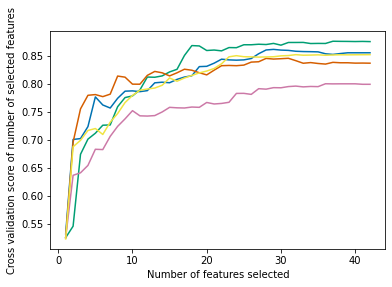

In [51]:
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(selector_LR.grid_scores_) + 1), selector_LR.grid_scores_)
plt.show()

# Splitting the dataset into train & test set.

In [52]:
df_HR = df_HR[df_HR.columns[selector_LR.support_]]

# Since we have class imbalance (i.e. more employees with turnover=0 than turnover=1)
# let's use stratify=y to maintain the same ratio as in the training dataset when splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(df_HR,
                                                    target,
                                                    test_size=0.25,
                                                    random_state=42,
                                                    stratify=target)  
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)
print('Resampled dataset shape %s' % Counter(y_train))

Number transactions X_train dataset:  (992, 31)
Number transactions y_train dataset:  (992,)
Number transactions X_test dataset:  (331, 31)
Number transactions y_test dataset:  (331,)
Resampled dataset shape Counter({0: 833, 1: 159})


# Balancing data with SMOTETomek

> As you know we have a dataset that the target variable is imbalanced and that may lead to a poor predictive performance, specifically for the minority class.


* **What is SMOTETomek?**

Class to perform over-sampling using SMOTE and cleaning using Tomek links.

* **What is over-sampling using SMOTE?**

SMOTE is one of the most popular oversampling techniques that is developed by Chawla et al. (2002). Unlike random oversampling that only duplicates some random examples from the minority class, SMOTE generates examples based on the distance of each data (usually using Euclidean distance) and the minority class nearest neighbors, so the generated examples are different from the original minority class.

In short, the process to generate the synthetic samples are as follows.

1. Choose random data from the minority class.
2. Calculate the Euclidean distance between the random data and its k nearest neighbors.
3. Multiply the difference with a random number between 0 and 1, then add the result to the minority class as a synthetic sample.
4. Repeat the procedure until the desired proportion of minority class is met.

* **What is Tomek links?**

Tomek Links is one of a modification from Condensed Nearest Neighbors (CNN, not to be confused with Convolutional Neural Network) undersampling technique that is developed by Tomek (1976). Unlike the CNN method that are only randomly select the samples with its k nearest neighbors from the majority class that wants to be removed, the Tomek Links method uses the rule to selects the pair of observation (say, a and b) that are fulfilled these properties:

1. The observation a’s nearest neighbor is b.
2. The observation b’s nearest neighbor is a.
3. Observation a and b belong to a different class. That is, a and b belong to the minority and majority class (or vice versa), respectively.
4. Mathematically, it can be expressed as follows.

Source: https://towardsdatascience.com/imbalanced-classification-in-python-smote-tomek-links-method-6e48dfe69bbc


In [53]:
smt = SMOTETomek(random_state=42)
X_train, y_train = smt.fit_resample(X_train, y_train)
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print('Resampled dataset shape %s' % Counter(y_train))

Number transactions X_train dataset:  (1666, 31)
Number transactions y_train dataset:  (1666,)
Resampled dataset shape Counter({0: 833, 1: 833})


# Creating the Voting Classifier with Logistic Regression, Random Forest & XGB Classifier.
 
 * **What is a Voting Classifier?**
 
A Voting Classifier is a machine learning model that trains on an ensemble of numerous models and predicts an output (class) based on their highest probability of chosen class as the output.
It simply aggregates the findings of each classifier passed into Voting Classifier and predicts the output class based on the highest majority of voting. The idea is instead of creating separate dedicated models and finding the accuracy for each them, we create a single model which trains by these models and predicts output based on their combined majority of voting for each output class.

Voting Classifier supports two types of votings:

1. Hard Voting: In hard voting, the predicted output class is a class with the highest majority of votes i.e the class which had the highest probability of being predicted by each of the classifiers. Suppose three classifiers predicted the output class(A, A, B), so here the majority predicted A as output. Hence A will be the final prediction.
2. Soft Voting: In soft voting, the output class is the prediction based on the average of probability given to that class. Suppose given some input to three models, the prediction probability for class A = (0.30, 0.47, 0.53) and B = (0.20, 0.32, 0.40). So the average for class A is 0.4333 and B is 0.3067, the winner is clearly class A because it had the highest probability averaged by each classifier.

Source: https://www.geeksforgeeks.org/ml-voting-classifier-using-sklearn/

In [54]:
# Use Stratified K Folds to keep the balance in the cross validation datasets.
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [55]:
#Creating the Vot
clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = xgb.XGBClassifier(eval_metric='auc', objective='binary:logistic', alpha=1)
eclf = VotingClassifier(estimators=[ ('lr', clf1), ('rf', clf2),('xgb', clf3)],voting='soft')

eclf_params = {

    'lr__C': np.linspace(1, 3, 10),
    'lr__penalty':['l1', 'l2'],
    'lr__solver' : ['liblinear'],

    
    'rf__n_estimators' : list(range(50, 101, 10)),
    'rf__max_features': ['auto', 'log2'],
    
    'xgb__subsample': [0.8, 0.9, 1.0],
    'xgb__colsample_bytree': np.linspace(0.6, 1, 5),
    'xgb__eta': np.linspace(0.001, 0.5, 2, 20),
    'xgb__n_estimators': [100, 250, 500],
    'xgb__max_depth': [4, 5, 6],
    'xgb__min_child_weight': [2, 3, 4],
}
voting_clf = RandomizedSearchCV(eclf, eclf_params, random_state=0, scoring='roc_auc', cv=skfold, n_iter=25)

In [56]:
%%time
voting_search = voting_clf.fit(X_train, y_train)

CPU times: user 10min 58s, sys: 24.3 s, total: 11min 22s
Wall time: 3min 12s


In [57]:
# Best AUC Score for the best voting classifier model.
voting_search.best_score_

0.9799121042238443

In [58]:
voting_search.best_params_

{'xgb__subsample': 0.9,
 'xgb__n_estimators': 500,
 'xgb__min_child_weight': 2,
 'xgb__max_depth': 5,
 'xgb__eta': 0.5,
 'xgb__colsample_bytree': 0.8,
 'rf__n_estimators': 50,
 'rf__max_features': 'auto',
 'lr__solver': 'liblinear',
 'lr__penalty': 'l1',
 'lr__C': 2.111111111111111}

In [59]:
# Saving the best Model
best_model = voting_search.best_estimator_

# Classifier Performance (AUC, Recall, Precision, Accuracy & F1 Score)

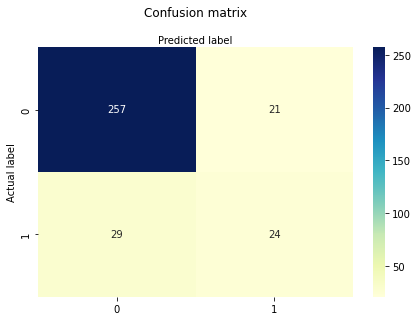

In [60]:

## Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, best_model.predict(X_test))
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label');



In [61]:
tp = cnf_matrix[1,1]
fn = cnf_matrix[1,0]
fp = cnf_matrix[0,1]
tn = cnf_matrix[0,0]
Accuracy  =  round(((tp+tn)/(tp+tn+fp+fn))*100,2)
Precision =  round((tp/(tp+fp))*100,2)
Recall    =  round((tp/(tp+fn))*100,2)
F1_score  =  round((2*(((tp/(tp+fp))*(tp/(tp+fn)))/((tp/(tp+fp))+(tp/(tp+fn)))))*100,2)
probs = best_model.predict_proba(X_test) # predict probabilities
probs = probs[:, 1] # we will only keep probabilities associated with the employee leaving
logit_roc_auc = round(roc_auc_score(y_test, probs),4) # calculate AUC score using test dataset

In [62]:
show_metrics = pd.DataFrame(data=[[Accuracy , Precision, Recall, F1_score,logit_roc_auc]],columns=['Accuracy %', 'Precision %', 'Recall %','F1_score %','AUC_Score'], index=['Valores'])
show_metrics.head()

,Accuracy %,Precision %,Recall %,F1_score %,AUC_Score
Valores,84.89,53.33,45.28,48.98,0.8459


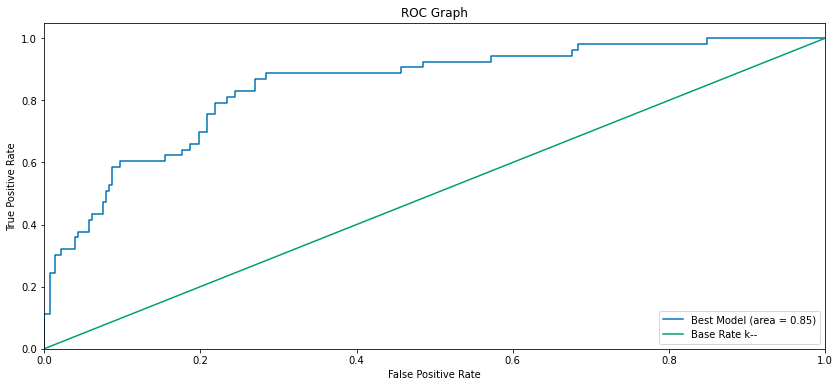

In [63]:
# Create ROC Graph
fpr, tpr, thresholds = roc_curve(y_test, best_model.predict_proba(X_test)[:,1])
plt.figure(figsize=(14, 6))

# Plot Best Model ROC
plt.plot(fpr, tpr, label='Best Model (area = %0.2f)' % logit_roc_auc)

# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' ' k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()

# Conclusion
As we can see we have a very robust model with a high AUC Score, and also a good F1 Score that will not only be precise but also propositive when there is a probable attrition in the company,this will help to identify the potential leavers and retain them before it's too late.